In [2]:
# GoogleColabを使用
# 適当なフォルダ下にdemo.ipynbとsubmit_cif3_mixup_mthread.zipを配置。

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
# Googleドライブパス
google_dir = "/content/drive/MyDrive/Colab Notebooks/240111_signate_pretrian_dataset_submit"
if not os.path.exists(google_dir):
    print("google_dir is not exist.")

In [5]:
import shutil
# 投稿ファイルをコピー、展開
src = os.path.join(google_dir, "submit_cif3_mixup_mthread.zip")
dst = "./submit_cif3_mixup_mthread.zip"
shutil.copy(src, dst)
shutil.unpack_archive(dst, "./")

In [6]:
# 必要なモジュールインストール
!pip install -r ./submit/requirements.txt

In [7]:
# クラス数とクラスあたりの画像枚数
num_classes = 1000
num_images_per_class = 1000

In [8]:
# 小規模確認フラグ
# 本選規模(1000クラスx1000枚)は時間がかかるため
debug = True

In [9]:
if debug == True:
  # 小規模確認(10クラスx10枚)
  num_classes = 10
  num_images_per_class = 10

  import json
  # パラメータ読み取り
  params_path = "./submit/params"
  with open(os.path.join(params_path, 'multi_fractal_ifs_params.json')) as f:
    ifs_params = json.load(f)

  # クラス数と画像枚数の修正
  ifs_params["num_classes"] = num_classes
  ifs_params["num_image_per_class"] = num_images_per_class

  # パラメータ書き込み
  with open(os.path.join(params_path, 'multi_fractal_ifs_params.json'), 'w') as f:
    json.dump(ifs_params, f, indent=4)

In [10]:
# set the execution dir and output dir
exec_dir = os.path.abspath('./submit/src')
output_data_dir = os.path.abspath('./output/pretrain')
os.makedirs(output_data_dir, exist_ok=True)

In [11]:
import sys
# move to exec_dir
os.chdir(exec_dir)
sys.path.append(exec_dir)

In [12]:
# run the generator
from generator import Generator
Generator.get_params('../params')
Generator.generate(output_data_dir)

100%|██████████| 6000/6000 [00:00<00:00, 12067.29it/s]


/content/output/pretrain
iclass = 00000


100%|██████████| 10/10 [00:00<00:00, 145.75it/s]


iclass = 00001


100%|██████████| 10/10 [00:00<00:00, 177.22it/s]


iclass = 00002


100%|██████████| 10/10 [00:00<00:00, 180.41it/s]


iclass = 00003


100%|██████████| 10/10 [00:00<00:00, 148.86it/s]


iclass = 00004


100%|██████████| 10/10 [00:00<00:00, 129.18it/s]


iclass = 00005


100%|██████████| 10/10 [00:00<00:00, 128.90it/s]


iclass = 00006


100%|██████████| 10/10 [00:00<00:00, 173.27it/s]


iclass = 00007


100%|██████████| 10/10 [00:00<00:00, 182.09it/s]


iclass = 00008


100%|██████████| 10/10 [00:00<00:00, 179.16it/s]


iclass = 00009


100%|██████████| 10/10 [00:00<00:00, 169.32it/s]


/content/output/pretrain/00009/00005.png


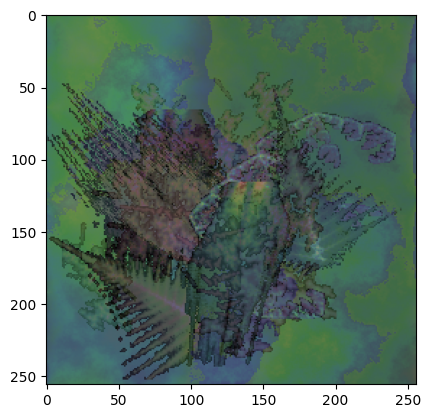

In [22]:
# 確認表示
import glob
image_files = glob.glob(os.path.join(output_data_dir, "*", "*.png"))
import matplotlib.pyplot as plt
import cv2
import random
image_file = random.choice(image_files)
print(image_file)
image_org = cv2.imread(image_file)
image_show = cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB)
plt.imshow(image_show)